#### Importing the necessary libraries

In [71]:
# %pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing the dataset

In [72]:
df = pd.read_csv('customerchurn.csv', sep = ',') 
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preparation and cleaning
##### Understanding the Dataset

In [73]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print(df.dtypes)

# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# check missing values
print(df.isnull().sum())


# summary estatistics
print(df.describe())


Number of rows: 7043
Number of columns: 21
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract  

##### Data transformation

In [74]:
#handling missing values
df = df.dropna()
df.isnull().sum()

#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

#removing useless columns
df = df.drop(columns=['customerID'])
# we can remove the ones we dont use at the end

Number of duplicate rows: 0


In [75]:

#checking outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - number of outliers: {outliers.shape[0]}")


tenure - number of outliers: 0
MonthlyCharges - number of outliers: 0
TotalCharges - number of outliers: 0


##### Customer Tenure Logistic Regression

[[586 450]
 [ 35 338]]
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.64      1409
weighted avg       0.81      0.66      0.67      1409

Accuracy: 0.6557842441447835
Optimization terminated successfully.
         Current function value: 0.475818
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5630
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.1779
Time:                        15:29:16   Log-Likelihood:                -2680.8
converged:                       True   LL-Nu

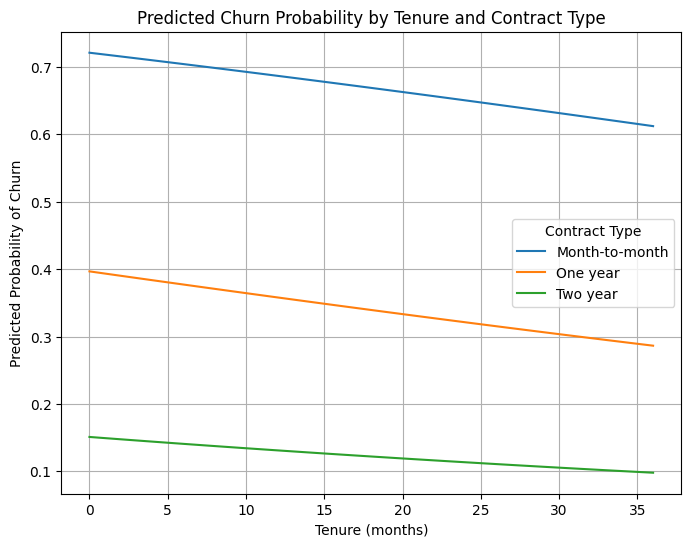

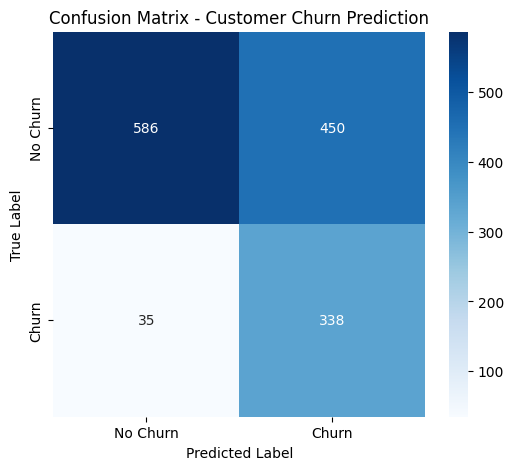

In [19]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('customerchurn.csv', sep = ',') 
df.head() 

predictive_data = df[['Churn', 'tenure', 'Contract']].copy()
predictive_data['Churn'] = predictive_data['Churn'].map({'No': 0, 'Yes': 1})

predictive_data = pd.get_dummies(predictive_data, columns=['Contract'], drop_first=True)
predictive_data.head()

X = predictive_data[['tenure', 'Contract_One year', 'Contract_Two year']]
y = predictive_data['Churn']

# %pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients


# %pip install statsmodels
import statsmodels.api as sm
import numpy as np

# Add constant term
X_const = sm.add_constant(X_train)

# Convert everything to float
X_const = X_const.astype(float)
y_train = y_train.astype(float)

# Fit the model
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()

print(result.summary())

import matplotlib.pyplot as plt
import pandas as pd

# Create a smooth range of tenure values (e.g., 0 to 72 months)
tenure_range = np.linspace(0, 36, 100)

# Set up different contract scenarios
contracts = ['Month-to-month', 'One year', 'Two year']

# Prepare the plot
plt.figure(figsize=(8, 6))

for contract in contracts:
    # Build a DataFrame of inputs for this contract type
    if contract == 'Month-to-month':
        X_plot = pd.DataFrame({
            'tenure': tenure_range,
            'Contract_One year': 0,
            'Contract_Two year': 0
        })
    elif contract == 'One year':
        X_plot = pd.DataFrame({
            'tenure': tenure_range,
            'Contract_One year': 1,
            'Contract_Two year': 0
        })
    else:
        X_plot = pd.DataFrame({
            'tenure': tenure_range,
            'Contract_One year': 0,
            'Contract_Two year': 1
        })
    
    # Predict churn probabilities
    probs = model.predict_proba(X_plot)[:, 1]
    
    # Plot the probability curve
    plt.plot(tenure_range, probs, label=contract)

# Add labels and title
plt.title("Predicted Churn Probability by Tenure and Contract Type")
plt.xlabel("Tenure (months)")
plt.ylabel("Predicted Probability of Churn")
plt.legend(title="Contract Type")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Customer Churn Prediction')
plt.show()